In [ ]:
import pandas as pd

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                "hours-per-week", "native-country", "income"]

data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*')



In [ ]:
#Histograms for Numerical Features
import matplotlib.pyplot as plt

num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data[num_features].hist(figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [ ]:
#Bar Plots for Categorical Features
import seaborn as sns

cat_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in cat_features:
    plt.figure(figsize=(15,6))
    sns.countplot(y=feature, data=data, order = data[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert categorical columns to dummy variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['workclass', 'relationship', 'race', 'sex'])

# Select relevant columns and compute the correlation matrix
columns_to_consider = ['education-num', 'age', 'hours-per-week'] + [col for col in data_encoded if col.startswith(('workclass', 'relationship', 'race', 'sex'))]
corr = data_encoded[columns_to_consider].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()




In [ ]:

import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

#

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                "hours-per-week", "native-country", "income"]

data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*')
print(data.info())

for column in data.columns:
    print(column, ":", data[column].unique())
##查找缺失值 cleaning


### Data Cleaning ###

# Handling Missing Values
# Replace missing values in numerical columns with median
for col in ['age', 'hours-per-week', 'education-num']:
    data[col].fillna(data[col].median(), inplace=True)

# Replace missing values in categorical columns with mode
for col in ['occupation', 'workclass', 'relationship', 'race', 'sex']:
    data[col].fillna(data[col].mode()[0], inplace=True)
# REmove native country missing value
data.dropna(subset=['native-country'], inplace=True)

# Encoding Categorical Features (using Label Encoding)
for col in ['occupation', 'workclass', 'relationship', 'race', 'sex']:
    data[col] = data[col].astype('category').cat.codes




            age    fnlwgt  education-num  capital-gain  capital-loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours-per-week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3           -0.035429  
4           -0.

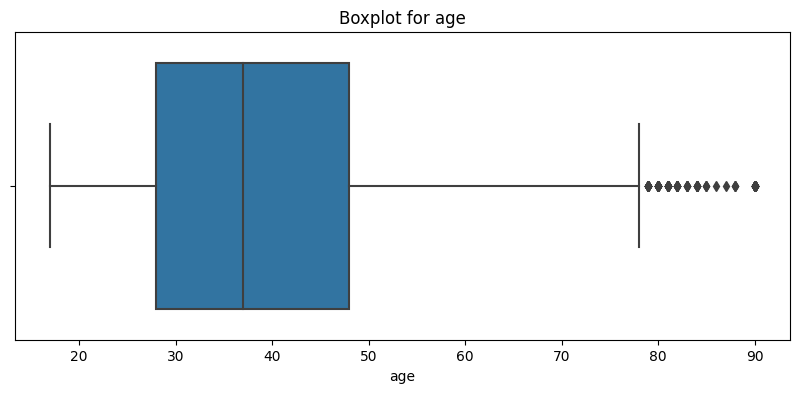

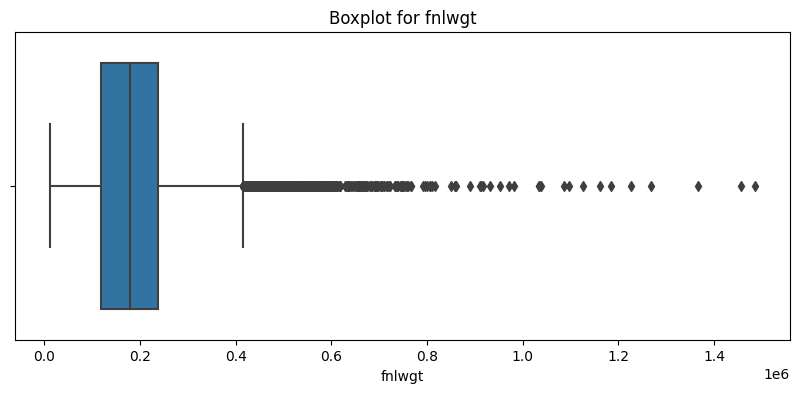

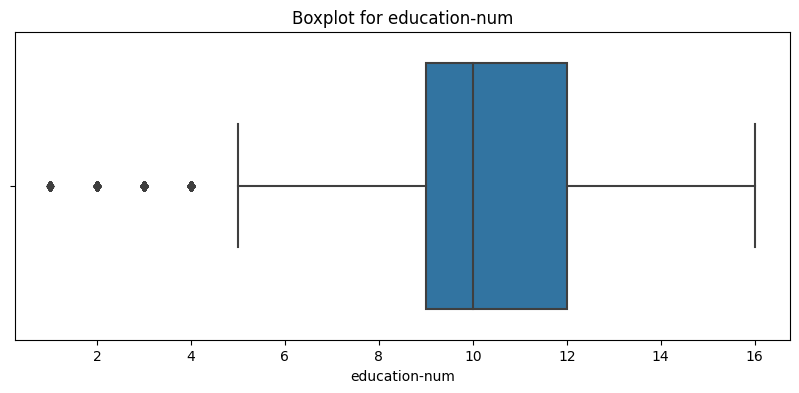

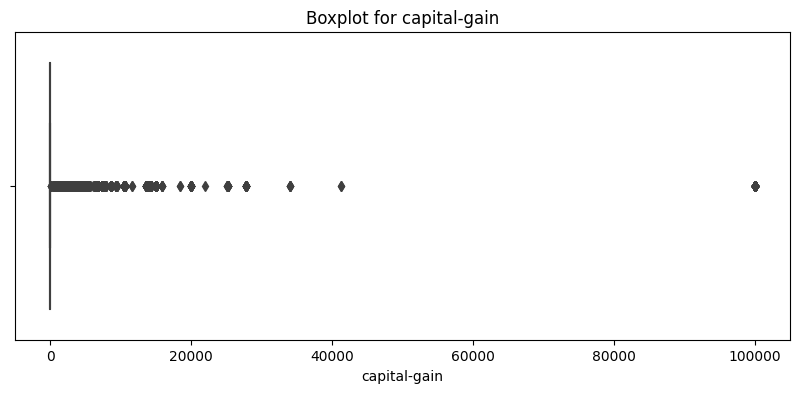

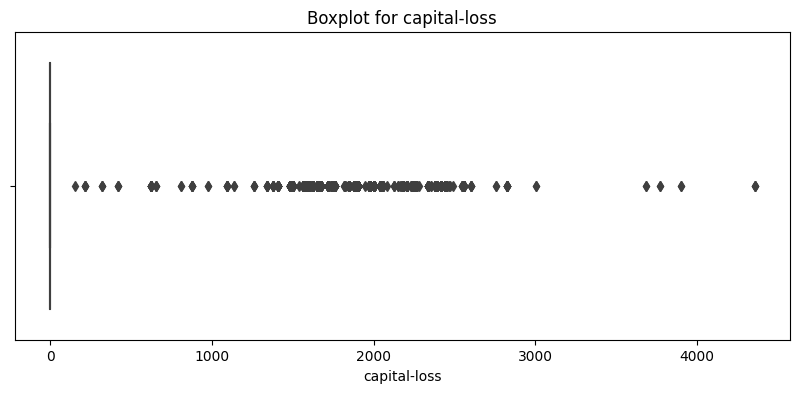

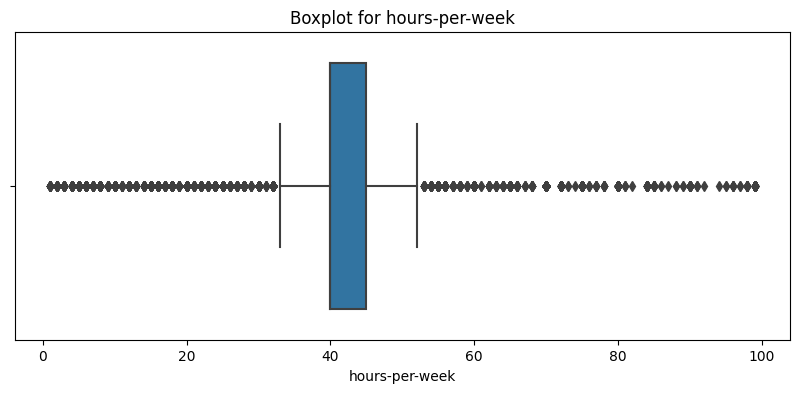

In [43]:
from scipy.stats import zscore


### Outlier Detection


##Z score
numeric_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
z_scores = zscore(data[numeric_cols])
abs_z_scores = np.abs(z_scores)
# print z score
print(z_scores)
# This will be a boolean dataframe where True indicates it's an outlier
outliers_zscore = (abs_z_scores > 3).all(axis=1)
# print outlier z score
print(outliers_zscore)

## IQR
numeric_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# This will create a boolean DataFrame where True indicates the presence of an outlier
outliers = (data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))
# Removing outliers detected by Z-score
data_clean_zscore = data[~outliers_zscore]

# Removing outliers detected by IQR
data_clean_iqr = data[~outliers_iqr]


##box plot
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


